# Environmental Health Analysis: PM2.5 levels and Respiratory Diseases in Major Nigerian Cities (2018–2023)
This notebook analyzes the relationship between air quality (PM2.5 levels) and respiratory health outcomes across Lagos, Abuja, Port Harcourt, and Kano.


In [24]:
# import necessary libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

# Set plot style
plt.style.use('default')
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=['#636EFB', '#FFFFFF'])

In [17]:
df = pd.read_csv('dataset/Airpollution-and-Publichealth_dataset.csv')

# Data Overview & Preprocessing
This section provides an overview of the dataset and performs basic cleaning to ensure consistency and readiness for analysis.

In [19]:
df.head()

,Unnamed: 0,city,year,pm25_annual,population,respiratory_cases,rate_per_100k
0,0,Lagos,2018,89.56,14029002,36086,257.22
1,1,Lagos,2019,85.10,14327530,50221,350.52
2,2,Lagos,2020,79.86,14428199,48446,335.78
3,3,Lagos,2021,69.84,14800018,35757,241.60
4,4,Lagos,2022,80.13,15195849,43928,289.08


In [55]:
df.shape # displays dataset dimension

(24, 6)

In [22]:
df.columns # check dataset columns 

Index(['Unnamed: 0', 'city', 'year', 'pm25_annual', 'population',
       'respiratory_cases', 'rate_per_100k'],
      dtype='object')

In [42]:
df.drop(columns=['Unnamed: 0'], inplace=True) # drop the unnecessary index column 
df.columns

Index(['city', 'year', 'pm25_annual', 'population', 'respiratory_cases',
       'rate_per_100k'],
      dtype='object')

In [67]:
df.info() # check datatype and missing values 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   city               24 non-null     object 
 1   year               24 non-null     int64  
 2   pm25_annual        24 non-null     float64
 3   population         24 non-null     int64  
 4   respiratory_cases  24 non-null     int64  
 5   rate_per_100k      24 non-null     float64
dtypes: float64(2), int64(3), object(1)
memory usage: 1.3+ KB


In [46]:
df.describe() # statistical summary of dataset 

,year,pm25_annual,population,respiratory_cases,rate_per_100k
count,24.000000,24.000000,2.400000e+01,24.000000,24.000000
mean,2020.500000,70.303333,8.553365e+06,21055.791667,269.841667
std,1.744557,20.267865,5.808256e+06,14780.828461,90.416358
min,2018.000000,34.580000,2.497038e+06,4831.000000,141.990000
25%,2019.000000,49.857500,2.938447e+06,8481.750000,203.532500
50%,2020.500000,70.370000,8.172270e+06,16367.000000,258.250000
75%,2022.000000,88.105000,1.412831e+07,32511.750000,338.095000
max,2023.000000,102.450000,1.556459e+07,50221.000000,489.260000


In [60]:
df.isnull().sum()  # Check for missing values

city                 0
year                 0
pm25_annual          0
population           0
respiratory_cases    0
rate_per_100k        0
dtype: int64

In [62]:
df.duplicated().sum() # Check for duplicates

0

In [48]:
df.nunique(axis=0).sort_values().to_frame(name= 'unique values')  # check number of unique values in each column

,unique values
city,4
year,6
pm25_annual,24
population,24
respiratory_cases,24
rate_per_100k,24


**Summary**

- dataset contains 24 rows and 6 columns: covers *4 cities* over *6 years* (2018–2023).
- dropped redundant column
- No missing values: all columns have 24 non-null entries.
- No duplicates
- No inconsistencies
- Data types are appropriate:

The dataset is clean and analysis-ready: required minimal preprocessing.

# Exploratory Data Analysis (EDA)
This section explores the data distribution, patterns, and relationships between air quality (PM2.5) and respiratory health outcomes.
outline:
- Univariate analysis: examines each variable individually
- Bivariate analysis: comparing PM2.5 and health indicators

## Univariate analysis 

### 1. Distribution and Trend of PM2.5 concentration
- Distribution of PM2.5 levels
- Average PM2.5 concentration per city
- Trend Analysis: PM2.5 Concentrations Over Time (2018–2023)

In [101]:
df['city'].value_counts() # Count of records per city

city
Lagos            6
Abuja            6
Port Harcourt    6
Kano             6
Name: count, dtype: int64

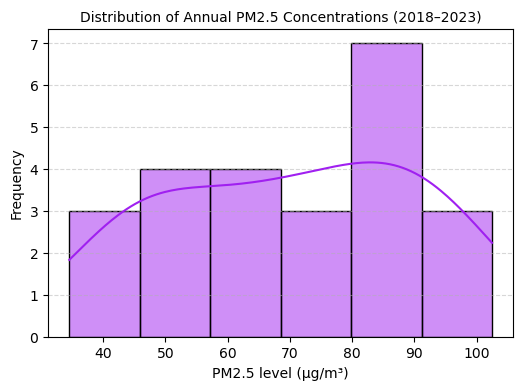

In [252]:
# Distribution of PM2.5 levels

plt.figure(figsize=(6,4))
sns.histplot(df['pm25_annual'], kde=True, color='#A020F0', edgecolor='k')
plt.title('Distribution of Annual PM2.5 Concentrations (2018–2023)', fontsize=10)
plt.xlabel('PM2.5 level (µg/m³)')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

The distribution of annual PM2.5 concentrations between 2018 and 2023 appears **mostly uniform**, with a **slight left skew**. 
This means Most cities consistently recorded high levels of PM2.5, generally ranging between 40 and 100 µg/m³. The absence of a strong skew suggests that pollution is widespread and persistently high, rather than concentrated in a few hotspots.

In [462]:
# Average PM2.5 per city
city_pm25 = df.groupby('city')['pm25_annual'].mean().sort_values(ascending=False)
city_pm25.to_frame(name= 'Average PM2.5_annual')

,Average PM2.5_annual
city,
Port Harcourt,94.473333
Lagos,80.423333
Abuja,61.975000
Kano,44.341667


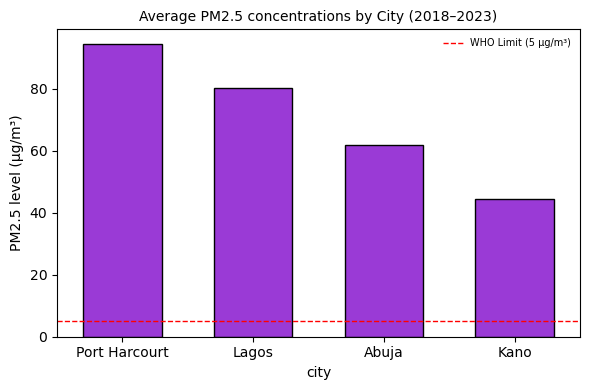

In [442]:
# plot of Average PM2.5 concentration per city

plt.figure(figsize=(6,4))
sns.barplot(x=city_pm25.index, y=city_pm25.values, color='#A020F0', width=0.6, edgecolor='k')
plt.title('Average PM2.5 concentrations by City (2018–2023)', fontsize=10)
plt.ylabel('PM2.5 level (µg/m³)')
plt.xlabel('city')

plt.axhline(y=5, color='r', linestyle='--', linewidth=1, label='WHO Limit (5 µg/m³)')
plt.legend(fontsize=7, loc='upper right', frameon=False)

plt.tight_layout()
plt.show()

From the chart, **Port Harcourt** consistently records the highest average PM2.5 concentration between 2018 and 2023, followed by Lagos. Abuja and Kano show relatively lower pollution levels but, they still remain above the **WHO recommended annual limit of 5 µg/m³**.

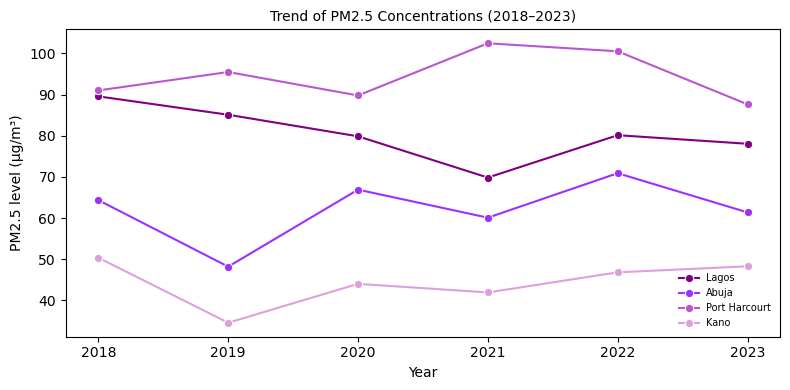

In [242]:
# PM2.5 Concentrations Over Time (2018–2024)

plt.figure(figsize=(8,4))
sns.lineplot(data=df, x='year', y='pm25_annual', 
             hue='city', marker='o', 
             palette=['#800080', '#9B30FF', '#BA55D3', '#DDA0DD'])
plt.title('Trend of PM2.5 Concentrations (2018–2023)', fontsize=10)
plt.ylabel('PM2.5 level (µg/m³)')
plt.xlabel('Year')

plt.legend(fontsize=7, title_fontsize=8, loc='lower right', frameon=False)
plt.tight_layout()
plt.show()

All four cities has their PM2.5 levels consistently above the WHO annual limit.
Port Harcourt stands out as the most polluted throughout the period, with Lagos trailing behind. Although there are minor fluctuations, the overall trend remains persistently highrs.

### 2. Distribution and Trend of Respiratory Cases
- respiratory cases per city

In [464]:
# Respiratory cases per city
city_health = df.groupby('city')['rate_per_100k'].sum().sort_values(ascending=False)
city_health.to_frame()

,rate_per_100k
city,
Port Harcourt,2314.98
Lagos,1736.00
Abuja,1359.68
Kano,1065.54


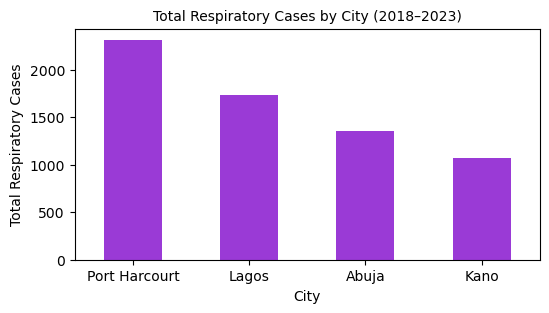

In [466]:
# plot of Respiratory cases per city

plt.figure(figsize=(6,3))
sns.barplot(x=city_health.index, 
            y=city_health.values, 
            color='#A020F0', 
            width=0.5)
plt.title('Total Respiratory Cases by City (2018–2023)', fontsize=10)
plt.xlabel('City')
plt.ylabel('Total Respiratory Cases')
plt.show()

## Bivariate analysis: PM₂.₅ vs. Respiratory Health

In [303]:
# Average PM2.5 and Respiratory rates by city

city_summary = df.groupby('city')[[
    'pm25_annual', 'rate_per_100k']].mean().sort_values('pm25_annual', ascending = False)

city_summary

,pm25_annual,rate_per_100k
city,,
Port Harcourt,94.473333,385.830000
Lagos,80.423333,289.333333
Abuja,61.975000,226.613333
Kano,44.341667,177.590000


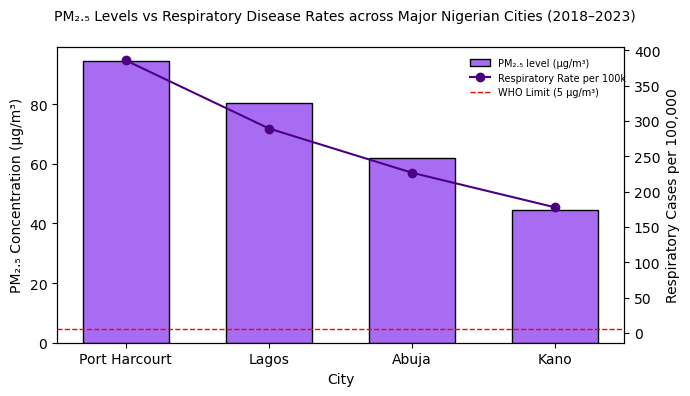

In [456]:
fig, ax1 = plt.subplots(figsize=(7,4))

# Barchart for PM2.5
bars = ax1.bar(city_summary.index, city_summary['pm25_annual'],
              color= '#A76CF2', edgecolor= 'k',
               width= 0.6, label= 'PM₂.₅ level (µg/m³)')
ax1.set_ylabel('PM₂.₅ Concentration (µg/m³)')
ax1.set_xlabel('City')

# Line Chart for Respiratory rates
ax2 = ax1.twinx()
line = ax2.plot(city_summary['rate_per_100k'], 
              color='#4B0082', marker='o', 
               linewidth= 1.5,
               label= 'Respiratory Rate per 100k')
ax2.set_ylabel('Respiratory Cases per 100,000')

# WHO guideline line
plt.axhline(y=5, color='r', linestyle='--', linewidth=1, label='WHO Limit (5 µg/m³)')

fig.suptitle('PM₂.₅ Levels vs Respiratory Disease Rates across Major Nigerian Cities (2018–2023)', 
             fontsize=10)
fig.legend(loc='upper center', bbox_to_anchor=(0.79, 0.88), frameon=False, fontsize=7)
plt.tight_layout()
plt.show()

# Correlation Analysis

# Results and Insights

In [ ]:
## Policy Implications